In [106]:
import pandas as pd
file_path = "./ref/시험_cctv_.csv"
CCTV = pd.read_csv(file_path, encoding="EUC-KR")
CCTV.sample(3)

,CCTV 명칭,CCTV 좌표,CCTV 그룹
147,(4차)_대저2동_5128-1_대저농협_맥도지점_앞,"10.1.11.172:0:0:0:0:0:0,10.1.11.172:9400:",강서-4차
3700,(5차)부용동1가38-10_부용민새마을금고_옆_킹마트_앞,"10.1.11.116:0:0:0:0:0:0,10.1.11.116:9400:",서구-5차
3218,시03-0036_괴정3동_낙동대로171번길20_태양빌라,"10.1.10.111:0:0:0:0:0:0,10.1.10.111:9400:",사하-3차


In [107]:
cctv = CCTV.rename(columns={"CCTV 그룹":"local"})['local']

In [108]:
cctv = cctv.apply(lambda x: x.split("-")[0])

cctv = cctv.value_counts()
cctv = cctv.reset_index()

In [109]:
cctv.sample(3)

,local,count
5,북구,403
14,기장,344
4,금정,403


In [110]:
import pandas as pd
import warnings
warnings.simplefilter("ignore", UserWarning)

file_path2 = "./ref/연령별인구현황월간202306.xlsx"
ori = pd.read_excel(file_path2,sheet_name="연령별인구현황",skiprows=3)
ori.head(2)

,행정기관코드,행정기관,총 인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,...,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
0,2600000000,부산광역시,"3,306,993","3,306,993","200,627","264,771","386,558","393,792","489,807","539,964",...,"128,872","187,837","191,071","242,526","276,337","296,378","172,706","87,000","13,119",384
1,2611000000,부산광역시 중구,"39,311","39,311",931,"1,773","5,638","4,310","4,582","6,423",...,914,"2,964","2,037","2,096","3,078","4,109","2,877","1,532",251,15


In [111]:
cctv

,local,count
0,사하,431
1,사상,422
2,해운대,418
3,동래,404
4,금정,403
5,북구,403
6,진구,395
7,영도,381
8,연제,377
9,동구,374


In [112]:
data = ori[['행정기관','총 인구수']]
data.columns = ["local","population"]
data = data.loc[1:]
data['local'] = data['local'].apply(lambda x: x.replace("부산광역시 ","").strip())
data = data.reset_index(drop=True) 
data

,local,population
0,중구,"39,311"
1,서구,"104,449"
2,동구,"86,809"
3,영도구,"107,006"
4,부산진구,"357,475"
5,동래구,"272,590"
6,남구,"255,786"
7,북구,"276,684"
8,해운대구,"383,355"
9,사하구,"300,922"


In [113]:
data["local"] = data["local"].apply(lambda x: x.replace("구","").replace("군","").replace("부산진","진구").strip() if len(x.strip())>2 else x.strip())

In [114]:
total = pd.merge(cctv, data, on='local')
total['population'] = total['population'].str.replace(",","").astype(int)
total = total.sort_values(by="population", ascending=False)
total = total.set_index('local') 
total

,count,population
local,,
해운대,418,383355
진구,395,357475
사하,431,300922
북구,403,276684
동래,404,272590
남구,351,255786
금정,403,218711
사상,422,203029
연제,377,202919


Text(0.2, 0.4, '한글')

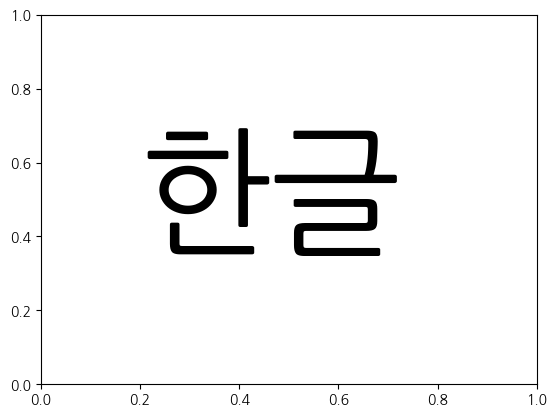

In [115]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family="NanumGothic")
plt.text(0.2,0.4,'한글',size=100)

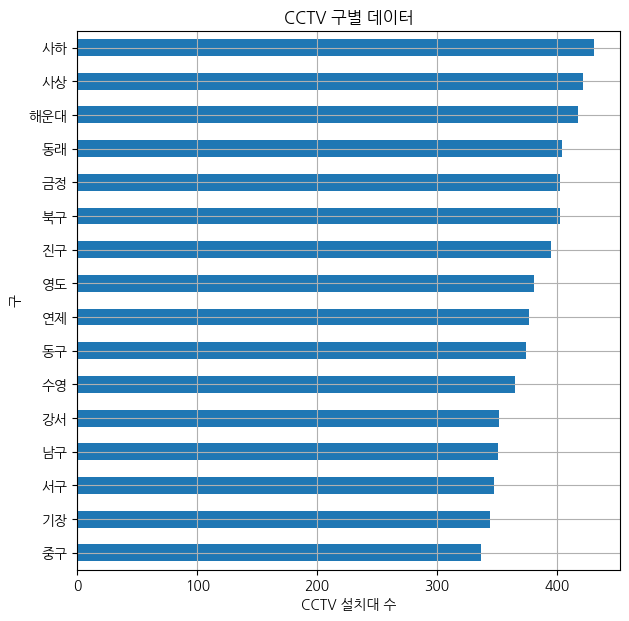

In [116]:
total['count'].sort_values().plot( kind="barh",grid=True,figsize=(7,7), ylabel="구")

plt.title("CCTV 구별 데이터")
plt.xlabel("CCTV 설치대 수")
plt.show()

[]

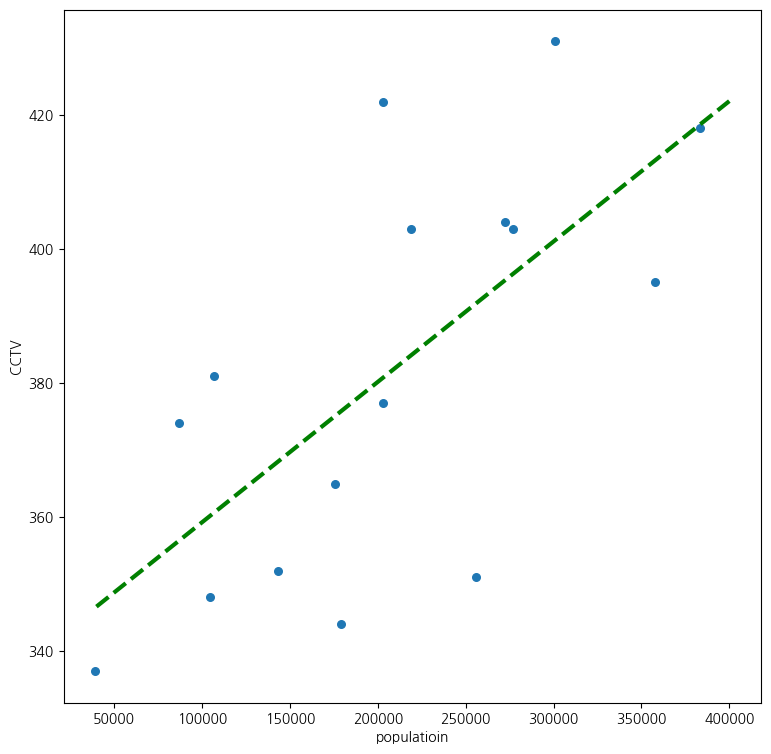

In [117]:
import numpy as np
fp1 = np.polyfit(total['population'],total['count'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000,400000,10)
plt.figure(figsize=(9,9))
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='g')
plt.scatter(total['population'], total['count'], s= 30)
plt.xlabel('populatioin')
plt.ylabel('CCTV')
plt.plot()

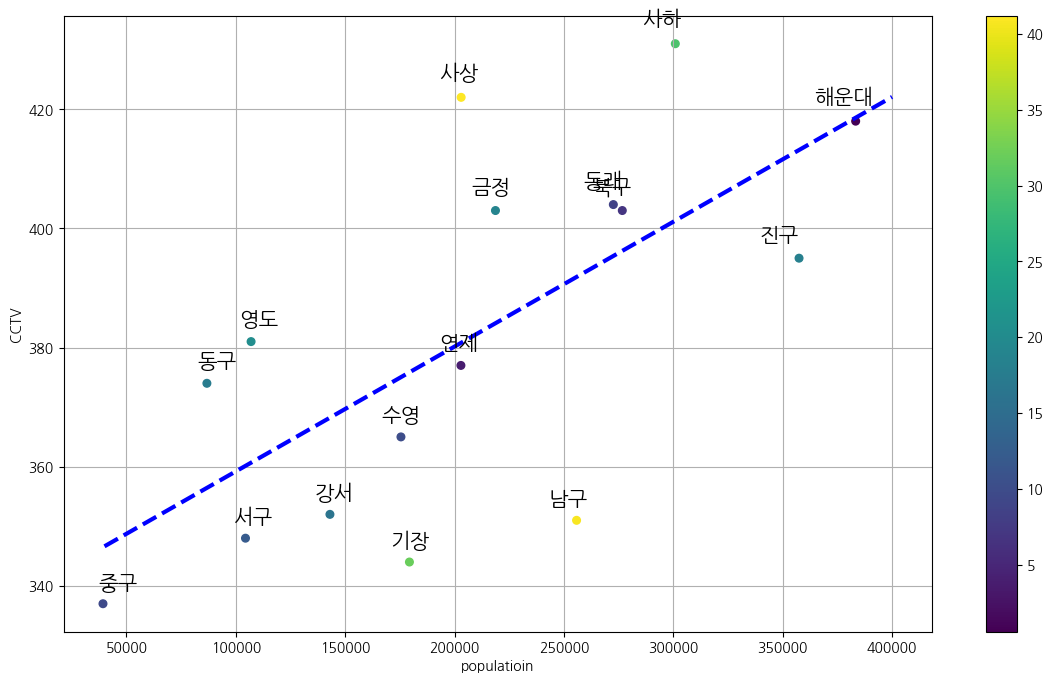

In [118]:
import numpy as np
fp1 = np.polyfit(total['population'],total['count'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000,400000,10)
plt.figure(figsize=(14,8))
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='b')

total['err'] = np.abs(total['count'] - f1(total['population']))

plt.scatter(total['population'], total['count'], s= 30, c = total['err'])
plt.xlabel('populatioin')
plt.ylabel('CCTV')
plt.plot()

for i in range(len(total['population'])):
    plt.text(total['population'].iloc[i]*0.95, total['count'].iloc[i]*1.007, total.index[i], fontsize=15)
plt.grid()
plt.colorbar()
plt.show()    

## 인사이트, 시사점

- np.polyfit을 이용해 1차 선형 회귀 직선을 그려 인구 수에 따른 예상 CCTV 설치 수를 계산함
- 산점도의 색상은 예측값과 실제값 간의 차이를 시각적으로 보여줌
- 라벨링된 지역이 회귀선보다 위쪽에 있다면, 인구 대비 CCTV가 많이 설치된 것이고, 아래쪽에 있으면 설치가 부족한 상태.
- 인구는 적은데 CCTV 수가 많은 지역은 운영비 낭비 가능성 있음.
- 단순히 인구 수가 아닌 유동인구, 범죄 발생 건수를 함께 고려하면 더욱 정밀한 정책 수립이 가능
- 인구는 많지만 CCTV가 적은 지역은 보안 취약 가능성 있음.
- 우선 설치 대상으로 지정해 범죄 예방 강화